In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


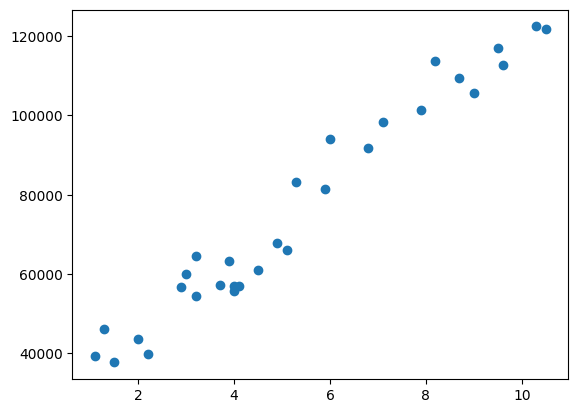

In [3]:
plt.scatter(df.YearsExperience, df.Salary)
plt.show()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### Extract and split

In [6]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [7]:
from sklearn.model_selection import train_test_split  

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [8]:
from sklearn.linear_model import LinearRegression  

reg = LinearRegression()  
reg.fit(x_train, y_train)

LinearRegression()

In [9]:
y_pred = reg.predict(x_test)
y_pred_train = reg.predict(x_train)

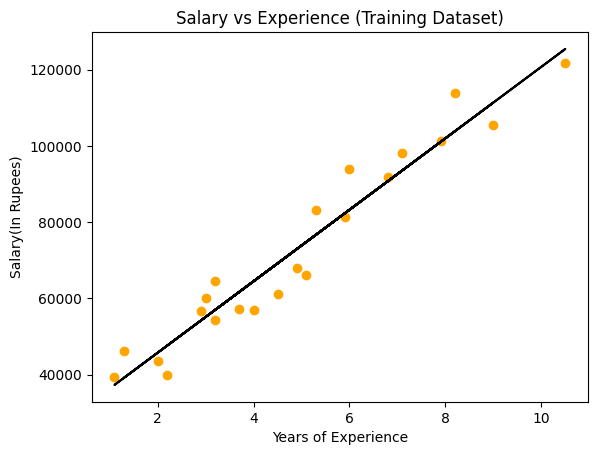

In [10]:
plt.scatter(x_train, y_train, color = "orange")
plt.plot(x_train, y_pred_train, color = "black")
plt.title("Salary vs Experience (Training Dataset)")  
plt.xlabel("Years of Experience")
plt.ylabel("Salary(In Rupees)")
plt.show()

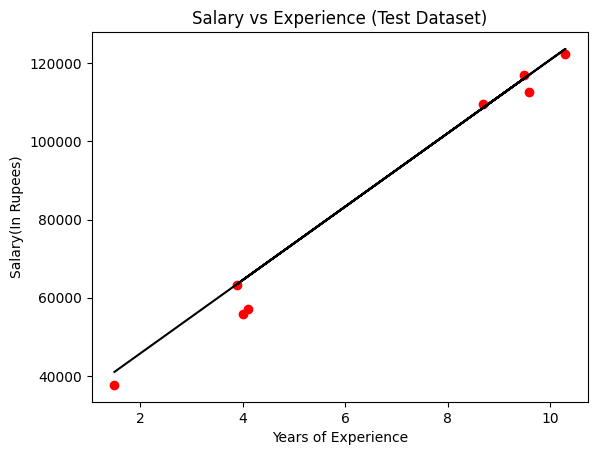

In [11]:
plt.scatter(x_test, y_test, color = "red")   
plt.plot(x_test, y_pred, color = "black")    
plt.title("Salary vs Experience (Test Dataset)")  
plt.xlabel("Years of Experience")  
plt.ylabel("Salary(In Rupees)")  
plt.show() 

### Metrics

- sklearn.metrics.mean_squared_error(y_true, y_pred, ....)
- sklearn.metrics.r2_score(y_true, y_pred, ....)

In [12]:
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [13]:
print('Mean Squared Error :',mse)
print('R square :',r2)
print()
print('Intercept of the model:',reg.intercept_)
print('Coefficient of the line:',reg.coef_)

Mean Squared Error : 22407940.143340684
R square : 0.9779208335417602

Intercept of the model: 26986.691316737248
Coefficient of the line: [9379.71049195]


# Multiple Linear Regession
- Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of `n_samples` (i.e. the sum of squares of each column totals 1).

In [14]:
from sklearn.datasets import load_diabetes

diab = load_diabetes()
df = pd.DataFrame(diab.data, columns=diab.feature_names)
df['target'] = diab.target

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [15]:
X = df.drop('target', axis=1).values
y = df['target'].values

In [16]:
y.shape

(442,)

In [17]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

In [18]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = reg.predict(X_test)  
x_pred = reg.predict(X_train)

In [20]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [21]:
print('Mean Squared Error :',mse)
print('R square :',r2)
print()
print('Intercept of the model:',reg.intercept_)
print('Coefficient of the line:',reg.coef_)

Mean Squared Error : 2345.070390374345
R square : 0.5883108120702464

Intercept of the model: 152.39717176932422
Coefficient of the line: [ -13.57326443 -238.95904683  486.85536532  315.2352753  -651.39611781
  389.12702664   35.97968456  143.02570613  713.92830636  101.63393701]
